In [95]:
import numpy as np
import numpy.random as random
from scipy.stats import qmc
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

## 1D Sampling

Comparing the differences between pseudo random number generation and halton sequence number generation

In [137]:
def sample1d(N, moment):   
    #random seed every trial
    seed = random.randint(10**5)
    random.seed(seed)
    sampler1d = qmc.Halton(1, scramble=True, seed=seed)
    
    #get random numbers
    u = random.random(N)
    h = sampler1d.random(n=N)

    #sample
    rand = np.zeros(N)
    halton = np.zeros(N)
    for i in range(N):
        rand[i] = np.cbrt(u[i])
        halton[i] = np.cbrt(h[i][0])
        
    return np.mean(np.power(rand, moment)), np.mean(np.power(halton, moment))

#### Convergence rate

In [9]:
moment = 1
rand_rate = []
halton_rate = []

for i in range(5):
    N = 10**(i+4)
    N_1 = 10**(3)
    
    rand_rate = np.append(rand_rate, abs(sample1d(N_1, moment)[0] - .75) / abs(sample1d(N, moment)[0] - .75))
    halton_rate = np.append(halton_rate, abs(sample1d(N_1, moment)[1] - .75) / abs(sample1d(N, moment)[1] - .75))

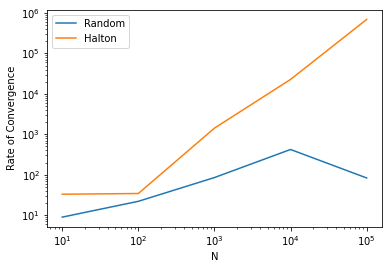

In [11]:
x = [10**1,10**2,10**3,10**4,10**5]
plt.plot(x, rand_rate, label='Random')
plt.plot(x, halton_rate, label='Halton')
plt.legend()
plt.xlabel('N')
plt.ylabel('Rate of Convergence')
plt.xscale('log')
plt.yscale('log')

### Std vs N

Comparing the change in error versus the number of samples (N)

In [150]:
def sample1d_std(N, moment):
    #random seed every trial
    seed = random.randint(10**5)
    random.seed(seed)
    sampler1d = qmc.Halton(1, scramble=True, seed=seed)
    
    #get random numbers
    u = random.random(N)
    h = sampler1d.random(n=N)
    
    #sample
    rand = np.zeros(N)
    halton = np.zeros(N)
    for i in range(N):
        rand[i] = np.cbrt(u[i])
        halton[i] = np.cbrt(h[i][0])
    
    #compute sample std
    rand_mean = np.mean(np.power(rand, moment))
    halton_mean = np.mean(np.power(halton, moment))
    
    rand_std = 1/np.sqrt(N) * np.sqrt(sum((rand-rand_mean)**2) / (N-1))
    halton_std = 1/np.sqrt(N) * np.sqrt(sum((halton-halton_mean)**2) / (N-1))
    
    return rand_std, halton_std

In [154]:
trials = 20
rand_std = np.zeros(trials)
halton_std = np.zeros(trials)
j=0

for i in np.linspace(100,10**8, trials):
    print(j)
    rand_std[j], halton_std[j] = sample1d_std(int(i), 1)
    j+=1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


Plotting psuedo random numbers we would expect convergence at rate $1/\sqrt{N}$

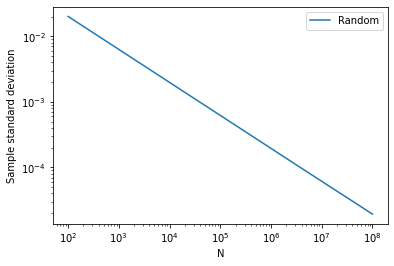

In [155]:
x = np.linspace(100,10**8, trials)
plt.plot(x, rand_std, label='Random')
plt.legend()
plt.xlabel('N')
plt.ylabel('Sample standard deviation')
plt.yscale('log')
plt.xscale('log')

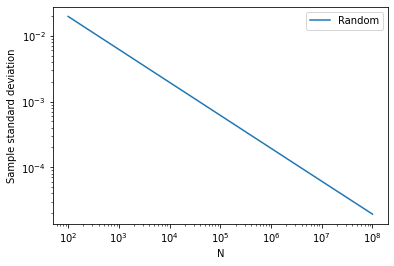

In [156]:
x = np.linspace(100,10**8, trials)
plt.plot(x, halton_std, label='Random')
plt.legend()
plt.xlabel('N')
plt.ylabel('Sample standard deviation')
plt.yscale('log')
plt.xscale('log')

### Sample mean vs Analytical mean

In [141]:
trials = 20
sample_vs_mean = np.zeros(trials)
j = 0

for i in np.linspace(100,10**6, trials):
    sample_vs_mean[j] = abs(sample1d(int(i), 1)[0] - .75)/.75
    j += 1

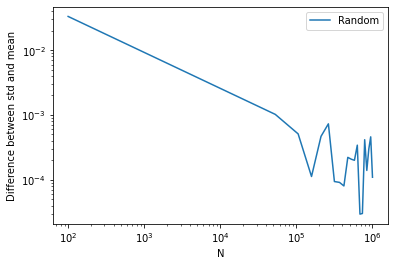

In [143]:
x = np.linspace(100,10**6, trials)
plt.plot(x, sample_vs_mean, label='Random')
plt.legend()
plt.xlabel('N')
plt.ylabel('Difference between std and mean')
plt.yscale('log')
plt.xscale('log')

### Sample std probability

In [149]:
trials = 1000
sample_vs_mean = np.zeros(trials)
j = 0

for i in np.linspace(100,10**5, trials):
    if abs(sample1d(int(i), 1)[0] - .75) <= sample1d_std(int(i), 1)[0]:
        j += 1
print('Number of trials within std = ', j/trials*100)
        

Number of trials within std =  68.7


### Convergence

##### First moment convergence

Converging to $$\int_0^1 \sqrt[3]{x} \, dx = 0.75$$

In [12]:
moment = 1

rand_rate = abs(sample1d(1000, moment)[0] - .75) / abs(sample1d(1000000, moment)[0] - .75)
halton_rate = abs(sample1d(1000, moment)[1] - .75) / abs(sample1d(1000000, moment)[1] - .75)

print('Pseudo random convergence rate:', rand_rate)
      
print('Halton random convergence rate:', halton_rate)

Pseudo random convergence rate: 19.514029974619426
Halton random convergence rate: 496.2444126376825


###### Second moment convergence

Converging to $$\int_0^1 \sqrt[3]{x^2} \, dx = 0.6$$

In [566]:
moment = 2

rand_rate = abs(sample1d(10000, moment)[0] - .6) / abs(sample1d(1000000, moment)[0] - .6)
halton_rate = abs(sample1d(10000, moment)[1] - .6) / abs(sample1d(1000000, moment)[1] - .6)

print('Pseudo random convergence rate:', rand_rate)
      
print('Halton random convergence rate:', halton_rate)

Pseudo random convergence rate: 45.87119855043671
Halton random convergence rate: 384.15554509551004


##### Third moment convergence

Converging to $$\int_0^1 \sqrt[3]{x^3} \, dx = 0.5$$

In [568]:
moment = 3

rand_rate = abs(sample1d(10000, moment)[0] - .5) / abs(sample1d(1000000, moment)[0] - .5)
halton_rate = abs(sample1d(10000, moment)[1] - .5) / abs(sample1d(1000000, moment)[1] - .5)

print('Pseudo random convergence rate:', rand_rate)
      
print('Halton random convergence rate:', halton_rate)

Pseudo random convergence rate: 14.320032828605175
Halton random convergence rate: 77.59463762367584


##### Fourth moment convergence

Converging to $$\int_0^1 \sqrt[3]{x^4} \, dx = \frac{3}{7}$$

In [569]:
moment = 4

rand_rate = abs(sample1d(10000, moment)[0] - (3/7)) / abs(sample1d(1000000, moment)[0] - (3/7))
halton_rate = abs(sample1d(10000, moment)[1] - (3/7)) / abs(sample1d(1000000, moment)[1] - (3/7))

print('Pseudo random convergence rate:', rand_rate)
      
print('Halton random convergence rate:', halton_rate)

Pseudo random convergence rate: 3.1099651314767156
Halton random convergence rate: 43.73573914443075


## 3D Sampling

In [18]:
sampler3d = qmc.Halton(3, scramble=True)

In [75]:
def sample3d(N, moment):
    u = random.random((N,3))
    h = sampler3d.random(n=N)

    rand = np.zeros((N,3))
    halton = np.zeros((N,3))

    for i in range(N):
        for j in range(3):
            rand[i,j] = np.cbrt(u[i,j])
            halton[i,j] = np.cbrt(h[i][j])
            
    return np.mean(np.power(rand, moment)), np.mean(np.power(halton, moment))

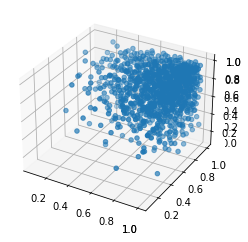

In [74]:
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
ax2 = fig.add_subplot(111, projection='3d')

ax1.scatter3D(rand1[:,0],rand1[:,1],rand1[:,2])
ax2.scatter3D(halton1[:,0],halton1[:,1],halton1[:,2])

In [84]:
moment = 1
rand3_rate = []
halton3_rate = []

for i in range(4):
    N = 10**(i+4)
    N_1 = 10**(3)
    
    rand3_rate = np.append(rand3_rate, abs(sample3d(N_1, moment)[0] - .75) / abs(sample3d(N, moment)[0] - .75))
    halton3_rate = np.append(halton3_rate, abs(sample3d(N_1, moment)[1] - .75) / abs(sample3d(N, moment)[1] - .75))

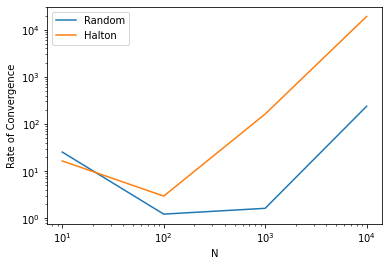

In [85]:
x = [10**1,10**2,10**3,10**4]
plt.plot(x, rand3_rate, label='Random')
plt.plot(x, halton3_rate, label='Halton')
plt.legend()
plt.xlabel('N')
plt.ylabel('Rate of Convergence')
plt.xscale('log')
plt.yscale('log')